## Finance Compalint Project -1 

### Exploratory Data Analysis

#### Problem Statement

The Consumer Fianancial Protection Bureau (CFPB) is a fedral U.S. agency that acts as a mediator when disputes arise between financial institutions and consumers, Via  a web form, consumers can send the agency a narretive of theri dispute.

This is a project made using Natural Language Processing (NLP) with machine learning models to process the issues text written in the complaint and other features in the dataset to predict if the constomer will dispute or not.

**Industry use case:** An NLP + Machine Leanring model would make the classification of wheather the consumer will disputer with the company or not and thus helping the company to prioritize the complaint based on the prediction.

**Importing Required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 50)

- Most of the companies even though they solved the issues and responded to both the customer and CFPB they choose not to provide public response. That can be a reason why consumer dispute response data is not publicaly available. this justify the N/A values in the target column.

- So while downloading this data N/A were removed.

**Import the Parquet file as Pandas Dataframe**

In [26]:
df = pd.read_parquet('data/complaints.parquet')

**Show Top 5 Records**

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-01-16,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,None,None,"EQUIFAX, INC.",TX,75060,None,None,Web,2025-01-16,In progress,Yes,None,11530884
1,2025-01-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,None,None,"EQUIFAX, INC.",CA,91306,None,None,Web,2025-01-16,In progress,Yes,None,11530895
2,2025-01-16,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,None,None,"EQUIFAX, INC.",IL,60402,None,None,Web,2025-01-16,In progress,Yes,None,11530897
3,2025-01-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,None,None,"EQUIFAX, INC.",VA,XXXXX,None,None,Web,2025-01-16,In progress,Yes,None,11530914
4,2025-01-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,None,None,"EQUIFAX, INC.",FL,34758,Older American,None,Web,2025-01-16,In progress,Yes,None,11530972


In [27]:
df.shape

(7352801, 18)

In [190]:
data = pd.concat([df[df['Consumer disputed?'] == 'Yes'], df[df['Consumer disputed?'] == 'No']], axis=0)

In [133]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
597765,2013-03-29,Credit reporting,None,Incorrect information on credit report,Account status,None,None,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",WA,98382,Older American,None,Web,2013-03-29,Closed with explanation,Yes,Yes,368810
840094,2016-07-25,Consumer Loan,Vehicle lease,Managing the loan or lease,None,None,None,ALLY FINANCIAL INC.,WA,98040,None,None,Referral,2016-07-26,Closed with explanation,Yes,Yes,2029317
865033,2015-10-28,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt is not mine,This is not my debt.,None,PORTFOLIO RECOVERY ASSOCIATES INC,CA,90805,None,Consent provided,Web,2015-10-29,Closed with explanation,Yes,Yes,1628264
890880,2017-01-18,Consumer Loan,Vehicle loan,Problems when you are unable to pay,None,have an auto loan with Santander Consumer usa....,None,Santander Consumer USA Holdings Inc.,NJ,07675,None,Consent provided,Web,2017-01-18,Closed with explanation,Yes,Yes,2293769
891106,2016-11-07,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",None,"Chase Mortgage, represented by XXXX, refused t...",None,JPMORGAN CHASE & CO.,IL,60137,None,Consent provided,Web,2016-11-07,Closed with explanation,Yes,Yes,2195552


**Unique values in target column**

In [134]:
data['Consumer disputed?'].value_counts(normalize=True)*100

Consumer disputed?
No     80.687718
Yes    19.312282
Name: proportion, dtype: float64

**Shape of the dataset**

In [135]:
data.shape

(768309, 18)

**As we can see `complaint_what_happended` has empty strings which can be converted to np.nan**

In [136]:
data.replace(np.nan, '', inplace=True)

In [137]:
data.isna().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

**Summary of the dataset**

In [138]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Complaint ID,768309.0,1.296085e+06,721729.205165,1.0,682683.0,1337361.0,1937301.0,2556948.0


**Check Datatypes in the dataset**

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768309 entries, 597765 to 7352796
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 768309 non-null  object
 1   Product                       768309 non-null  object
 2   Sub-product                   768309 non-null  object
 3   Issue                         768309 non-null  object
 4   Sub-issue                     768309 non-null  object
 5   Consumer complaint narrative  768309 non-null  object
 6   Company public response       768309 non-null  object
 7   Company                       768309 non-null  object
 8   State                         768309 non-null  object
 9   ZIP code                      768309 non-null  object
 10  Tags                          768309 non-null  object
 11  Consumer consent provided?    768309 non-null  object
 12  Submitted via                 768309 non-null  object
 13

## 3. Exploring Data

In [140]:
# define numerical & categorical columns
numerical_features = [feature for feature in data.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical columns: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical columns: {}'.format(len(categorical_features), categorical_features))

We have 1 numerical columns: ['Complaint ID']
We have 17 categorical columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']


- Here we have only categorical columns in the dataset

### Checking Null Values

In [141]:
missing = data.isnull().sum().div(data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
missing

,0
Date received,0.0
Product,0.0
Consumer disputed?,0.0
Timely response?,0.0
Company response to consumer,0.0
Date sent to company,0.0
Submitted via,0.0
Consumer consent provided?,0.0
Tags,0.0
ZIP code,0.0


In [191]:
drop_columns = ["Tags", "Consumer complaint narrative", "Company public response", "Sub-issue",
                "Sub-product", "ZIP code", "Complaint ID"]
data.drop(drop_columns, axis=1, inplace=True)

In [143]:
data.shape

(768309, 10)

In [144]:
data

,Date received,Product,Issue,Company,State,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
597765,2013-03-29,Credit reporting,Incorrect information on credit report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",WA,Web,2013-03-29,Closed with explanation,Yes,Yes
840094,2016-07-25,Consumer Loan,Managing the loan or lease,ALLY FINANCIAL INC.,WA,Referral,2016-07-26,Closed with explanation,Yes,Yes
865033,2015-10-28,Debt collection,Cont'd attempts collect debt not owed,PORTFOLIO RECOVERY ASSOCIATES INC,CA,Web,2015-10-29,Closed with explanation,Yes,Yes
890880,2017-01-18,Consumer Loan,Problems when you are unable to pay,Santander Consumer USA Holdings Inc.,NJ,Web,2017-01-18,Closed with explanation,Yes,Yes
891106,2016-11-07,Mortgage,"Application, originator, mortgage broker",JPMORGAN CHASE & CO.,IL,Web,2016-11-07,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
7352792,2014-07-10,Bank account or service,"Account opening, closing, or management","HUNTINGTON NATIONAL BANK, THE",PA,Referral,2014-07-16,Closed with explanation,Yes,No
7352793,2012-02-28,Mortgage,"Loan servicing, payments, escrow account",M&T BANK CORPORATION,VT,Web,2012-02-29,Closed with relief,Yes,No
7352794,2017-02-23,Credit reporting,Incorrect information on credit report,"EQUIFAX, INC.",NJ,Postal mail,2017-02-28,Closed with explanation,Yes,No
7352795,2015-02-19,Credit reporting,Unable to get credit report/credit score,"EQUIFAX, INC.",VA,Web,2015-02-19,Closed with non-monetary relief,Yes,No


In [145]:
data.isna().sum()

Date received                   0
Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

**Number of unique values in each column**

In [146]:
for col in data.columns:
    print(col, data[col].nunique())

Date received 1970
Product 13
Issue 99
Company 4279
State 63
Submitted via 6
Date sent to company 2049
Company response to consumer 7
Timely response? 2
Consumer disputed? 2


## Visualization

### 4.1 Visualize the Target Features (Customer Disputed)

**- Weather the consumer disputed the company's responses.**

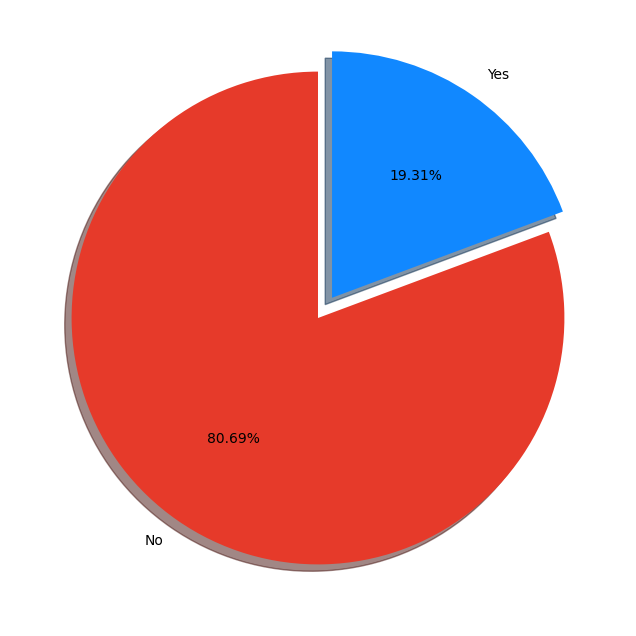

In [147]:
percentages = data['Consumer disputed?'].value_counts(normalize=True)*100
label = ["No", "Yes"]

# plot piechart with plotly library
fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
colors = ['#e63a2a', '#1188ff']
ax.pie(percentages, labels = label, startangle=90, autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()

- From above chart it is clear that Target Variable is imbalanced

**What is imbalanced data ?**

- Imabalanced data are type of data where target class has an uneven distribution of observations, i.e Here number of Not-stroke has more count than the number of stroke of the dataset.

## Products on which complaints are made.

- **The type of product of the consumer identified in the complaint.**

In [148]:
# Percentage of each top 10 product
data['Product'].value_counts(normalize=True).to_frame()[0:10]*100

,proportion
Product,
Mortgage,29.529655
Debt collection,18.965286
Credit reporting,18.277672
Credit card,11.608480
Bank account or service,11.220095
Student loan,4.233713
Consumer Loan,4.109544
Payday loan,0.721194
Money transfers,0.696855


**Visualize product percentage in a pie chart**

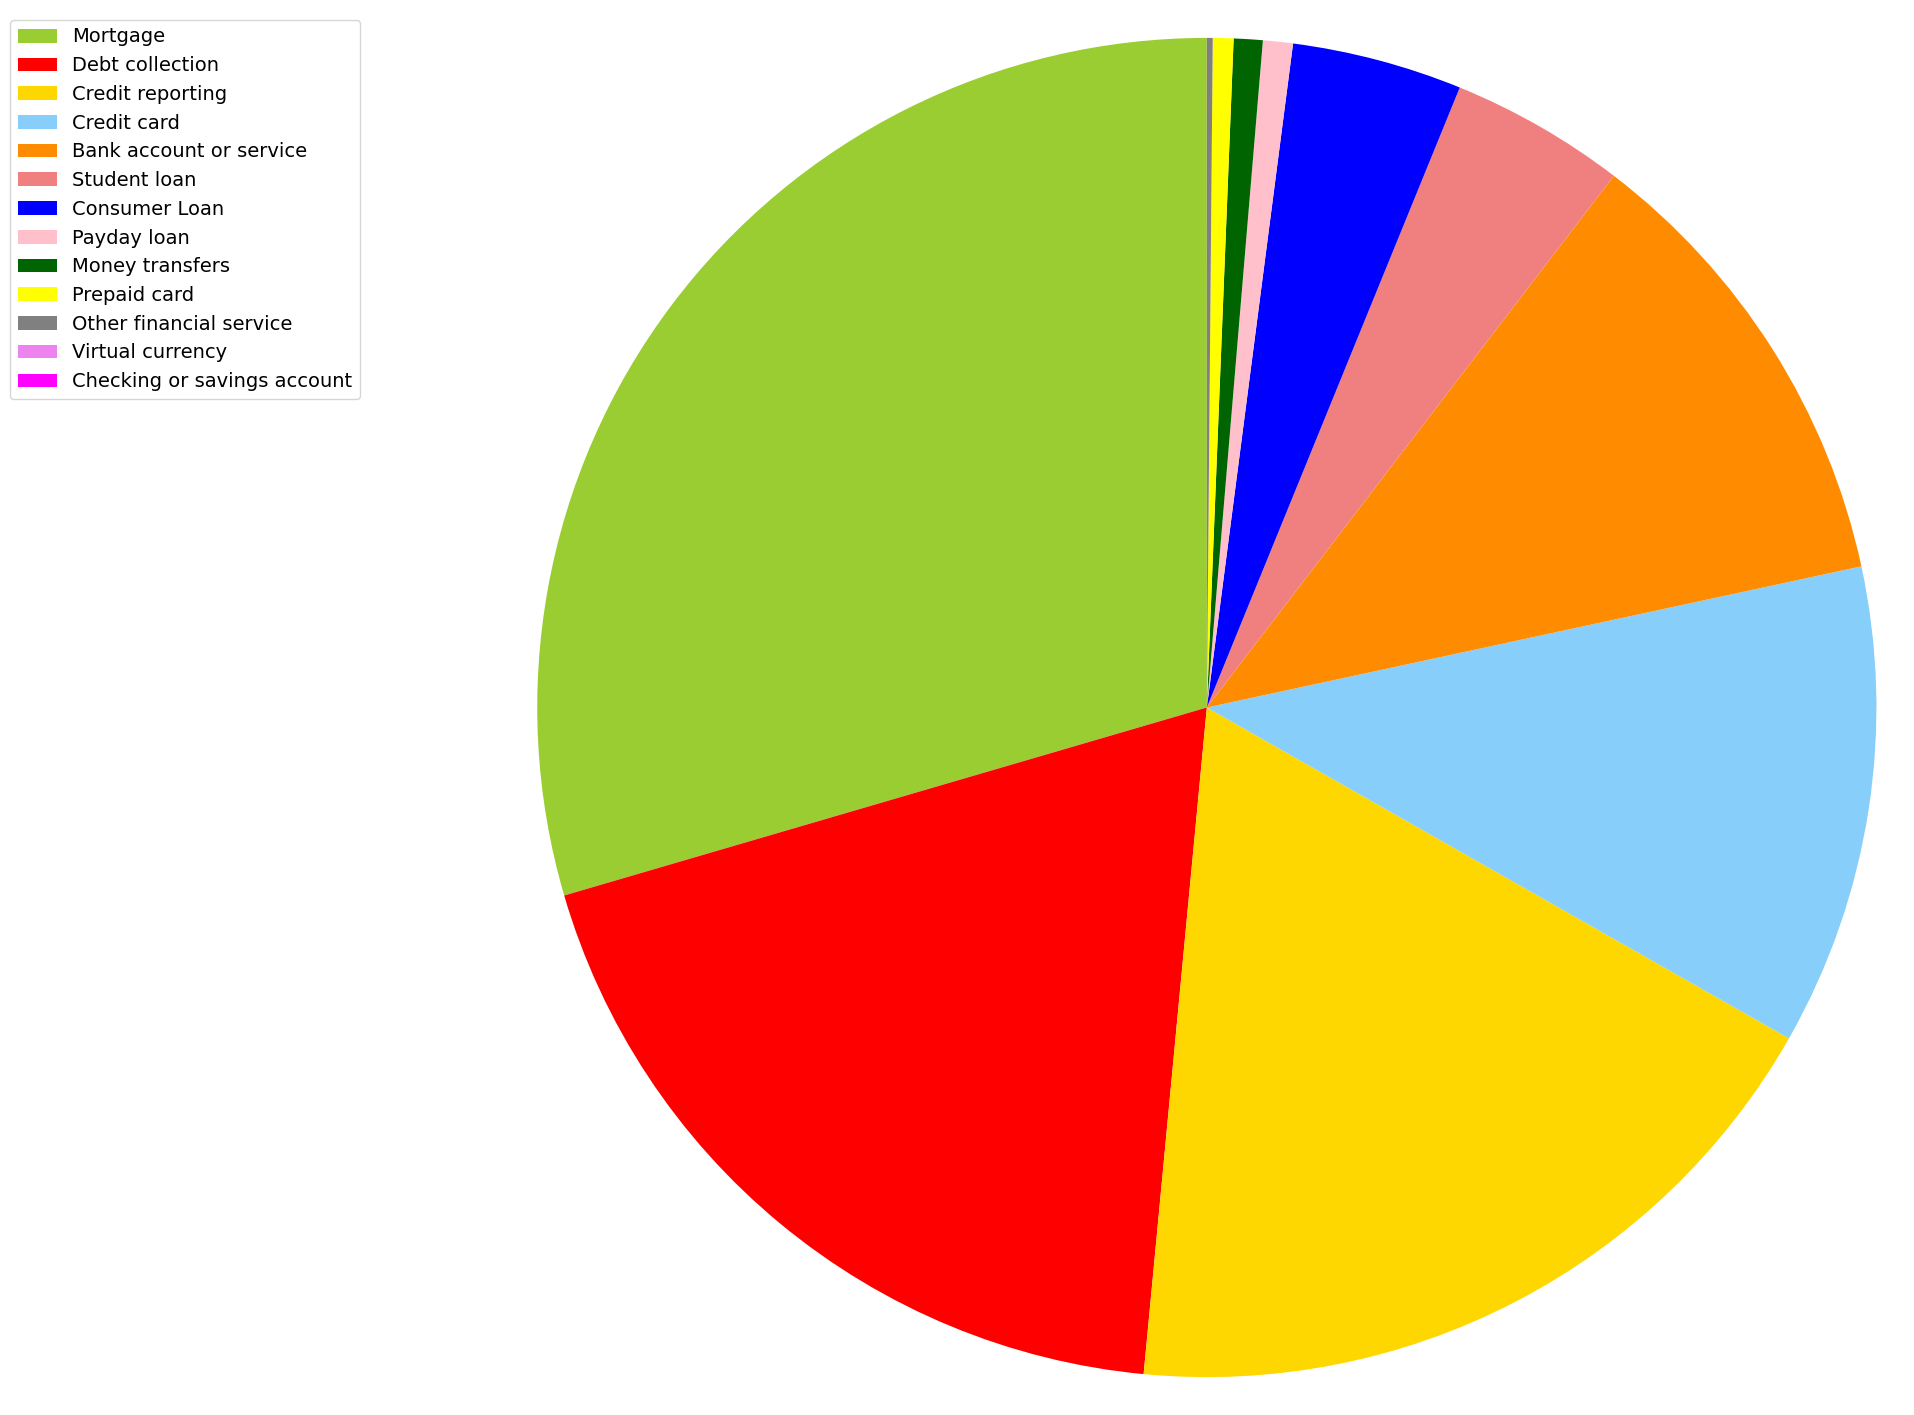

In [149]:
product_percentage = data['Product'].value_counts(normalize=True)*100
product_labels = product_percentage.index
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'darkorange', 'lightcoral', 'blue',
          'pink', 'darkgreen', 'yellow', 'grey', 'violet', 'magenta', 'cyon']

fig, ax = plt.subplots(figsize=(18, 19))
patches, texts = ax.pie(product_percentage, startangle=90, shadow=False, colors=colors, radius=1.2)

plt.legend(patches, product_labels, loc='best', bbox_to_anchor = (-0.1, 1.), fontsize=14)

plt.show()

**insights**

- Mortgage Product had the most finance complaints product which is 29% of total.
- It is followed by debt collection product which is 19% of total.

### States in US and theor impact on target feature

- **The state of the mailing address provided by the consumer.**

In [150]:
top_states = data['State'].value_counts(normalize=True)[0:10]*100
top_states.to_frame()

,proportion
State,
CA,14.396812
FL,9.577527
TX,7.731134
NY,6.836963
GA,4.716462
NJ,3.971970
IL,3.667405
PA,3.581892
VA,3.190643


<Axes: xlabel='State'>

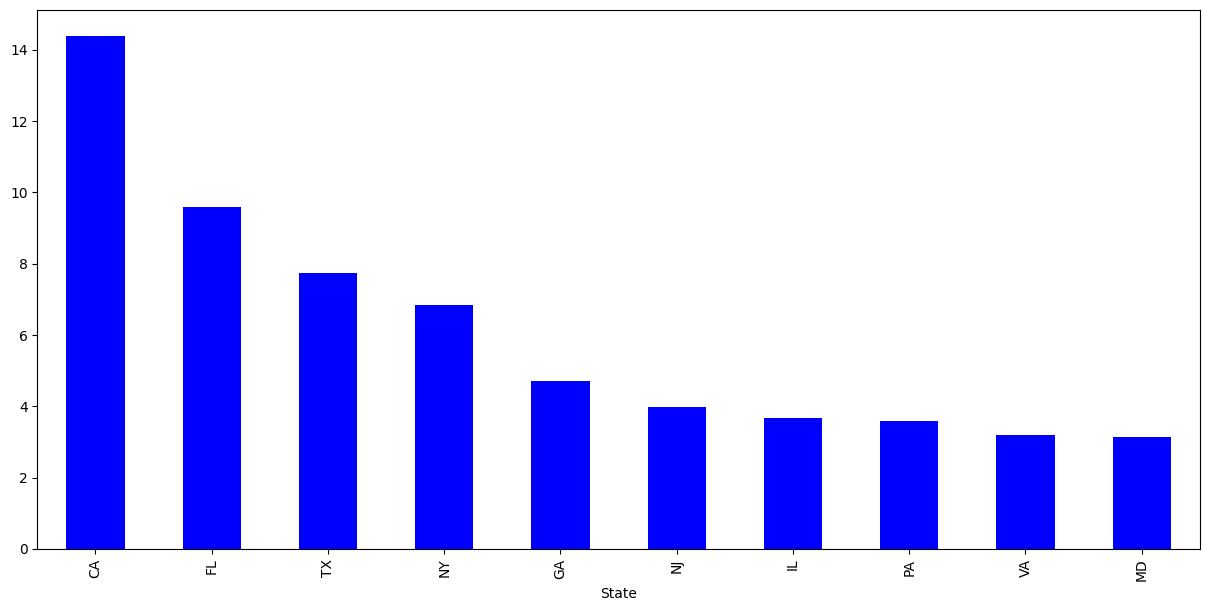

In [151]:
plt.subplots(figsize=(15, 7))
top_states.plot(kind='bar', color='blue')

**Insights**

- California has the highest number of complaints registered which is 14.5% of the total complaints

- Then followed by Florida with 9.6%.

## Company's Response and its effect on Target feature

- **The company's mandetory response for the particular compalaint**

In [152]:
data.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [153]:
data.groupby('Company response to consumer')['Consumer disputed?'].value_counts(normalize=True).to_frame()*100

proportion
Company response to consumer    Consumer disputed?            
Closed                          No                   79.416274
                                Yes                  20.583726
Closed with explanation         No                   78.772895
                                Yes                  21.227105
Closed with monetary relief     No                   89.415405
                                Yes                  10.584595
Closed with non-monetary relief No                   88.370777
                                Yes                  11.629223
Closed with relief              No                   86.651584
                                Yes                  13.348416
Closed without relief           No                   73.074771
                                Yes                  26.925229
Untimely response               No                   99.925844
                                Yes                   0.074156

**Proportion of consumer who has disputed and company's response**

In [157]:
disputed_df = data.loc[data['Consumer disputed?'] == 'Yes']
disputed_df['Company response to consumer'].value_counts(normalize=True).to_frame()*100

,proportion
Company response to consumer,
Closed with explanation,82.690830
Closed with non-monetary relief,7.479545
Closed with monetary relief,3.665638
Closed without relief,3.242394
Closed,2.443085
Closed with relief,0.477160
Untimely response,0.001348


**Visualization**

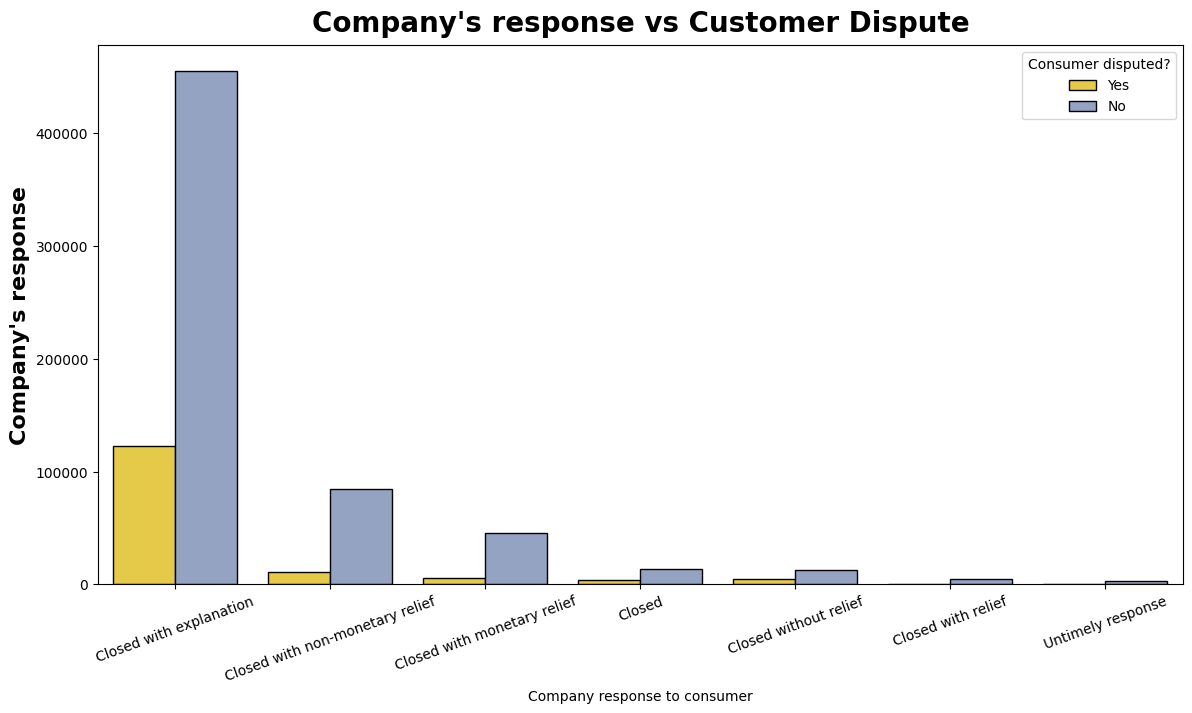

In [160]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="Company response to consumer", hue="Consumer disputed?", data=data, ec="black", palette="Set2_r")
plt.title("Company's response vs Customer Dispute", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.ylabel("Company's response", weight="bold", fontsize=16)
plt.xticks(rotation=20);

**Insight**

- From the above report, the insight is monst of the finance complaints where company's reponses is `Closed with explaination` has 82% of consumers dispute

## Finance Complaint Year and Disputed Consumer's count

- **The year the CFPB recieved the complaint.**

- As this is the imbalanced data. visualizing only the data in which consumer has dispute on the company's response

In [161]:
# create a copy of dispute consumer data
viz_df = disputed_df.copy()
viz_df['received_date'] = pd.to_datetime(viz_df['Date received']).dt.date
viz_df['received_month'] = pd.to_datetime(viz_df['Date received']).dt.month
viz_df['received_year'] = pd.to_datetime(viz_df['Date received']).dt.year

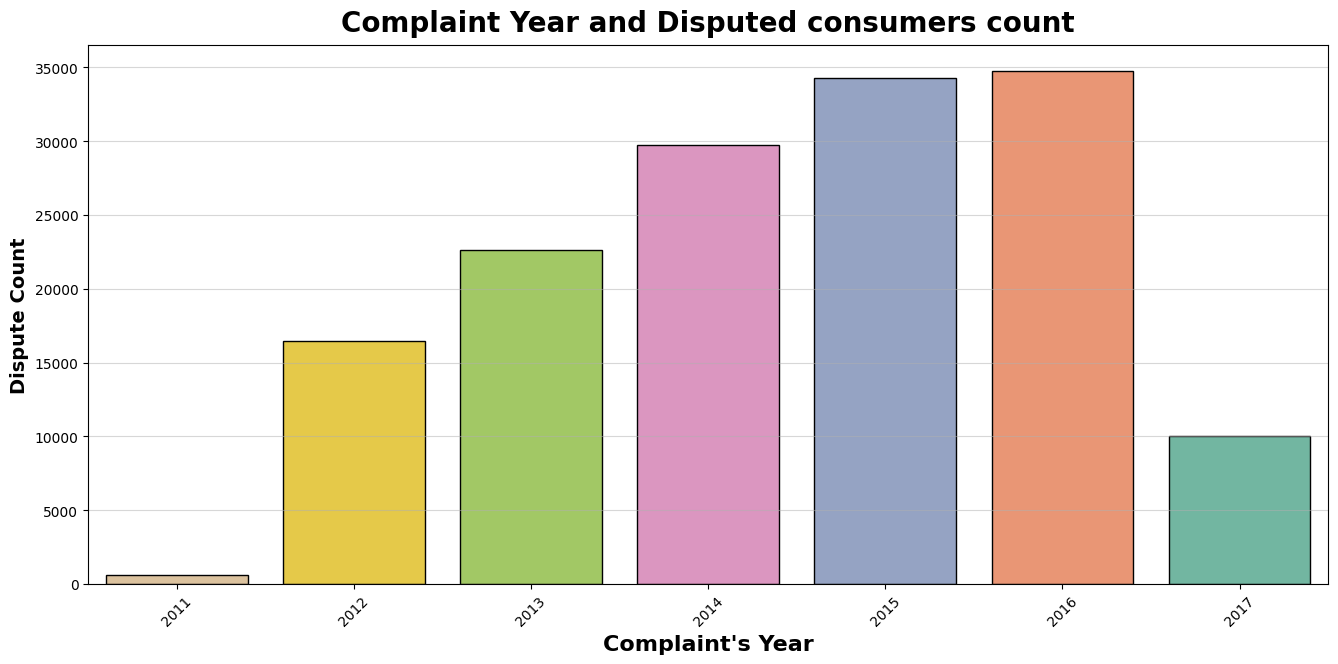

In [167]:
plt.subplots(figsize=(16, 7))
sns.countplot(x="received_year", data=viz_df, ec="black", palette="Set2_r")
plt.xticks(rotation=45)
plt.title("Complaint Year and Disputed consumers count", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's Year", weight="bold", fontsize=16)
plt.grid(alpha=0.5, axis="y")
plt.show();

**Insights**

- Complaints were Highest on 2016 and 2015
- Complaints were Least on 2017 and 2011

## Finance Complaint Month and Disputed Consumer's count

- **The month the CFPB received the complaint.**

**Map the Numerical months as month names**

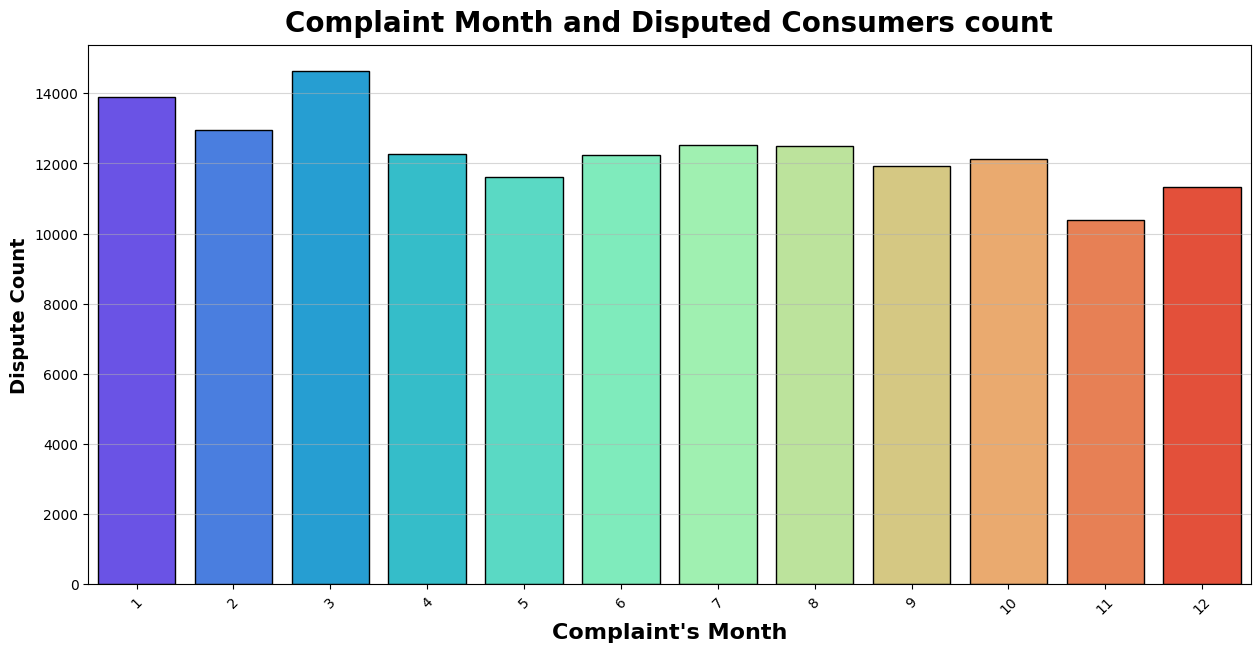

In [177]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.subplots(figsize=(15, 7))
sns.countplot(x="received_month", data=viz_df, ec = "black", palette="rainbow", 
            #   order=month_order
              )
plt.xticks(rotation=45)
plt.title("Complaint Month and Disputed Consumers count", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's Month", weight="bold", fontsize=16)
plt.grid(alpha=0.5, axis="y")
plt.show()

**Insights**

- Month of March had recieved more complaints than anyother month
- Q1 of the year had more financial complaints.

In [179]:
data.head()

,Date received,Product,Issue,Company,State,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
597765,2013-03-29,Credit reporting,Incorrect information on credit report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",WA,Web,2013-03-29,Closed with explanation,Yes,Yes
840094,2016-07-25,Consumer Loan,Managing the loan or lease,ALLY FINANCIAL INC.,WA,Referral,2016-07-26,Closed with explanation,Yes,Yes
865033,2015-10-28,Debt collection,Cont'd attempts collect debt not owed,PORTFOLIO RECOVERY ASSOCIATES INC,CA,Web,2015-10-29,Closed with explanation,Yes,Yes
890880,2017-01-18,Consumer Loan,Problems when you are unable to pay,Santander Consumer USA Holdings Inc.,NJ,Web,2017-01-18,Closed with explanation,Yes,Yes
891106,2016-11-07,Mortgage,"Application, originator, mortgage broker",JPMORGAN CHASE & CO.,IL,Web,2016-11-07,Closed with explanation,Yes,Yes


## Complaint Submission

- **How the complaint was submitted to the CFPB. for example, "Web" or "Phone"*

In [180]:
data['Submitted via'].value_counts(normalize=True).to_frame()*100

,proportion
Submitted via,
Web,68.064281
Referral,17.341721
Phone,6.792189
Postal mail,6.334951
Fax,1.421563
Email,0.045294


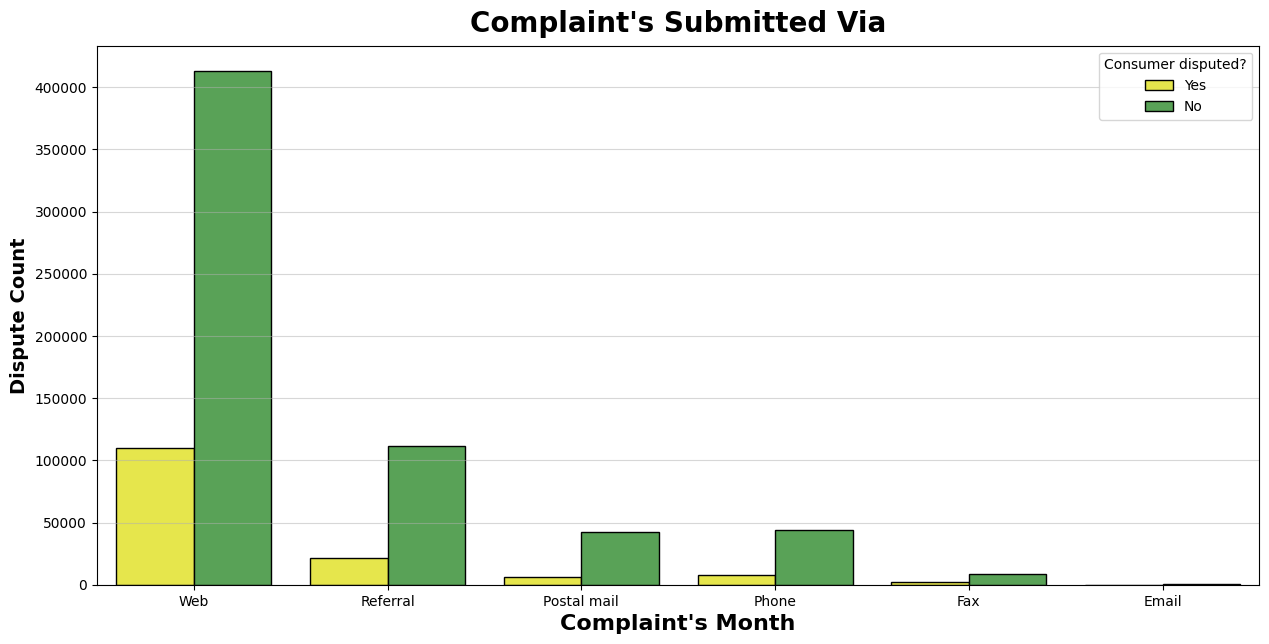

In [182]:
plt.subplots(figsize=(15, 7))
sns.countplot(x="Submitted via", hue="Consumer disputed?", data=data, ec="black", palette="Set1_r")
plt.title("Complaint's Submitted Via", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's Month", weight="bold", fontsize=16)
plt.grid(alpha=0.5, axis="y")
plt.show()

**Insights**

- 68% of total complaints were submitted via Web.
- Second most used platform to submit is Referral then followed by Phone.

## Timely response had any effect on Target column

In [183]:
data.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

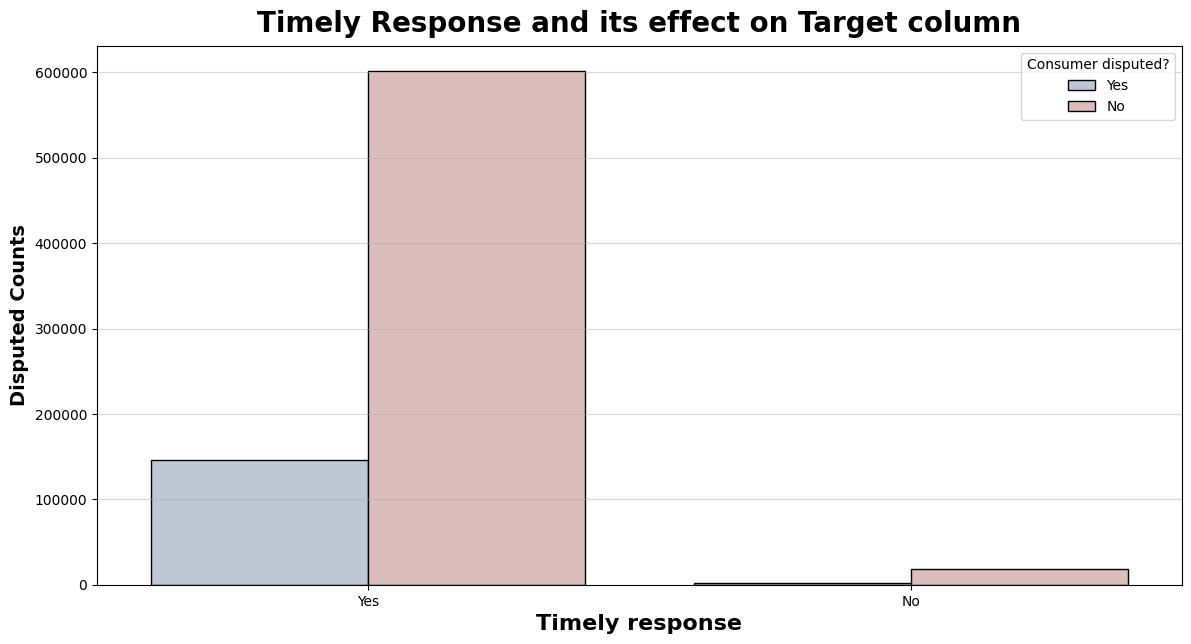

In [185]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="Timely response?", hue="Consumer disputed?", data=data, ec="black", palette="vlag")
plt.title("Timely Response and its effect on Target column", weight="bold", fontsize=20, pad=10)
plt.ylabel("Disputed Counts", weight="bold", fontsize=14)
plt.xlabel("Timely response", weight="bold", fontsize=16)
plt.grid(alpha=0.5, axis="y")
plt.show()

**Insights**

- Most of the complaints which had timely response also had consumer disputed
- No much impact on target column

## Consumer consent provided and its effect on Target column

- here consent provided columns is approved given by the consumer on publishing their complaints public.

In [187]:
data.head()

,Date received,Product,Issue,Company,State,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
597765,2013-03-29,Credit reporting,Incorrect information on credit report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",WA,Web,2013-03-29,Closed with explanation,Yes,Yes
840094,2016-07-25,Consumer Loan,Managing the loan or lease,ALLY FINANCIAL INC.,WA,Referral,2016-07-26,Closed with explanation,Yes,Yes
865033,2015-10-28,Debt collection,Cont'd attempts collect debt not owed,PORTFOLIO RECOVERY ASSOCIATES INC,CA,Web,2015-10-29,Closed with explanation,Yes,Yes
890880,2017-01-18,Consumer Loan,Problems when you are unable to pay,Santander Consumer USA Holdings Inc.,NJ,Web,2017-01-18,Closed with explanation,Yes,Yes
891106,2016-11-07,Mortgage,"Application, originator, mortgage broker",JPMORGAN CHASE & CO.,IL,Web,2016-11-07,Closed with explanation,Yes,Yes


Text(0.5, 0, 'Complaint Count')

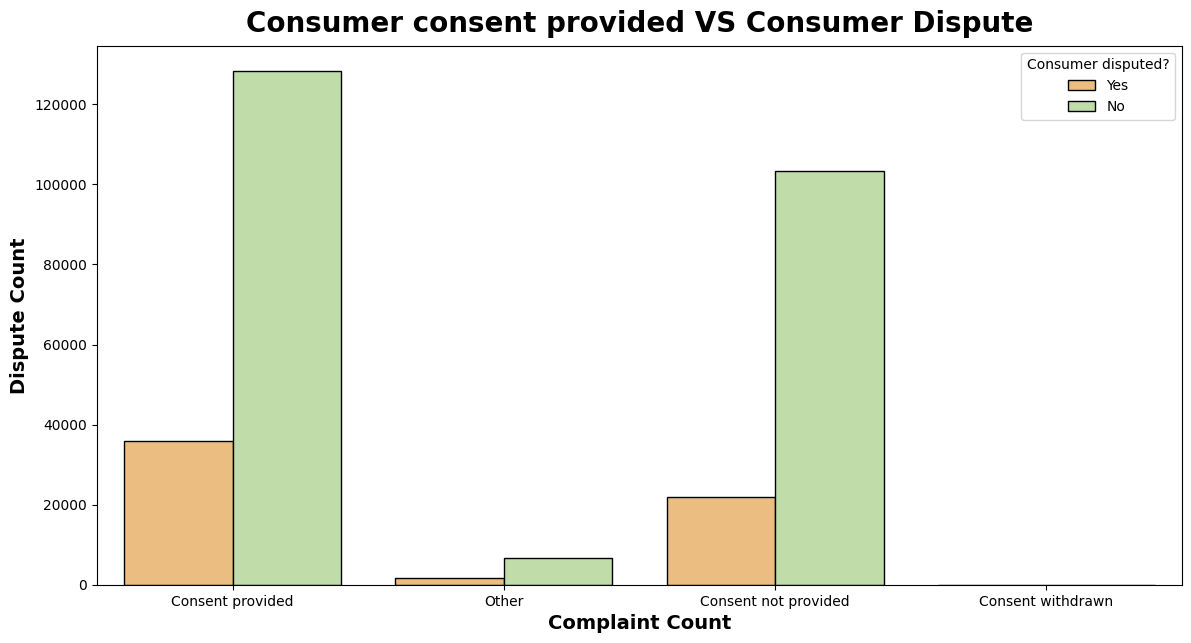

In [192]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="Consumer consent provided?", hue="Consumer disputed?", data=data, ec="black", palette="Spectral")
plt.title("Consumer consent provided VS Consumer Dispute", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint Count", weight="bold", fontsize=14)

**Insights**

- Most of the Record here is not available `N/A`.
- Consent Provided has more impact on the target variable. because most consumer wanted complaints to be public.

## Final Report

- Dataset is colelcted from consumer finance US government website
- `"Tags", "Consumer complaint narrative", "Company public response", "Sub-issue", "Sub-product", "ZIP code", "Complaint ID"` are the columns which can be removed as they are redundant or doesn't help the model.
- `Company` its a name column can be removed as it contains 4284 unique values, which cannot be used in model.
- new feature can be created `days_to_forward_complaint` which is the difference between `date_sent_to_company`, `date_received`.
- `issue` column is a text column , so text processing can be done and vectorized by tfidf for the model training.
- Null values can be imputed with mode.